In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset

# Define the path to the dataset folder
dataset_path = 'cnn_dataset'

# Define the transforms to be applied on the images
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Load the dataset
dataset = torchvision.datasets.ImageFolder(root=dataset_path, transform=transform)

# Split the dataset into train and val datasets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size=int(0.15 * len(dataset))
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size,test_size])

# Define the dataloaders for train and val datasets
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
# Define the class labels based on the subfolder names
class_labels = dataset.classes

# Print the class labels
print("Class labels: ", class_labels)
print("Size of train dataset: {}".format(len(train_dataset)))
print("Size of val dataset: {}".format(len(val_dataset)))
print("Size of test dataset: {}".format(len(test_dataset)))

Class labels:  ['dogs', 'food', 'vehicles']
Size of train dataset: 21000
Size of val dataset: 4500
Size of test dataset: 4500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


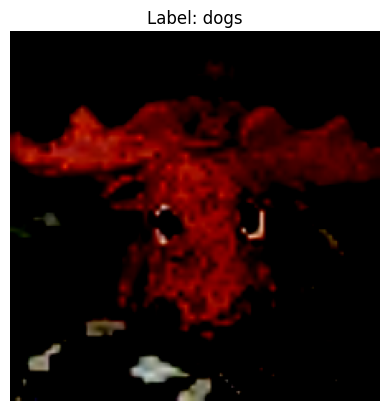

In [3]:
# Displaying a random image. 

idx = np.random.randint(len(dataset))

# Get the image and label from the dataset
image, label = dataset[idx]

# Convert the image tensor to numpy array and transpose the dimensions
image = np.transpose(image.numpy(), (1, 2, 0))

# Show the image
plt.imshow(image)
plt.title(f"Label: {class_labels[label]}")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


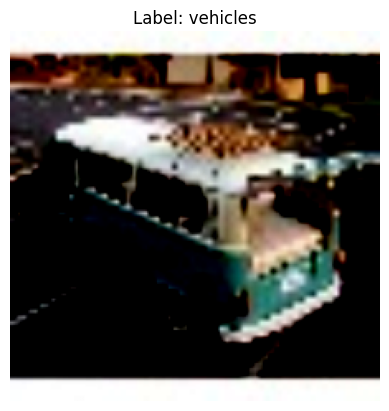

In [4]:
# Displaying a random image. 

idx = np.random.randint(len(dataset))

# Get the image and label from the dataset
image, label = dataset[idx]

# Convert the image tensor to numpy array and transpose the dimensions
image = np.transpose(image.numpy(), (1, 2, 0))

# Show the image
plt.imshow(image)
plt.title(f"Label: {class_labels[label]}")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


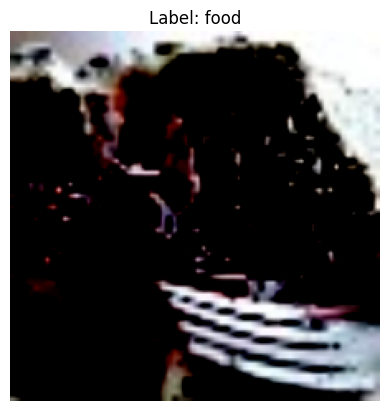

In [5]:
# Displaying a random image from the dataset

idx = np.random.randint(len(dataset))

# Get the image and label from the dataset
image, label = dataset[idx]

# Convert the image tensor to numpy array and transpose the dimensions
image = np.transpose(image.numpy(), (1, 2, 0))

# Show the image
plt.imshow(image)
plt.title(f"Label: {class_labels[label]}")
plt.axis('off')
plt.show()

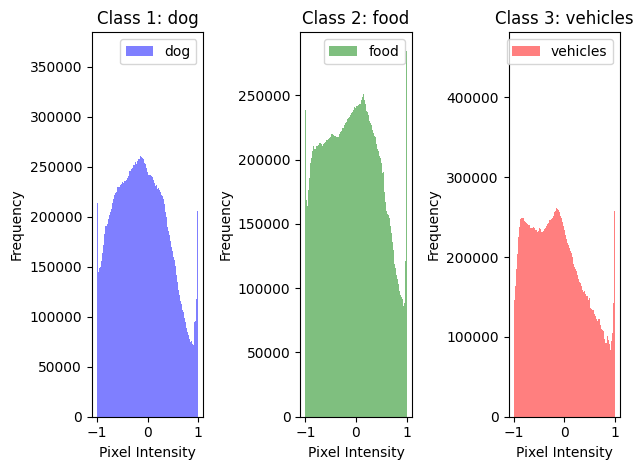

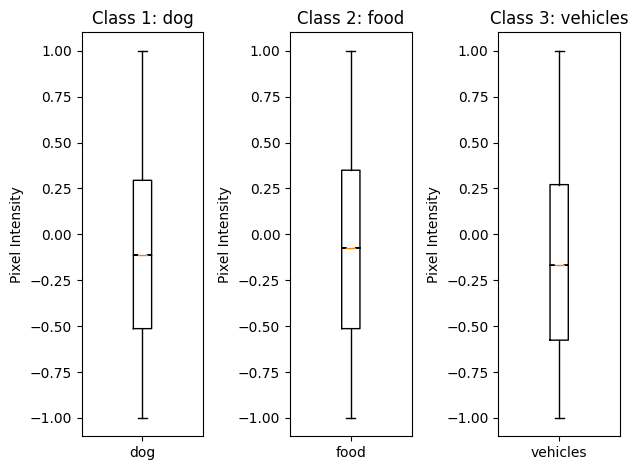

Text(0, 0.5, 'Image Index')

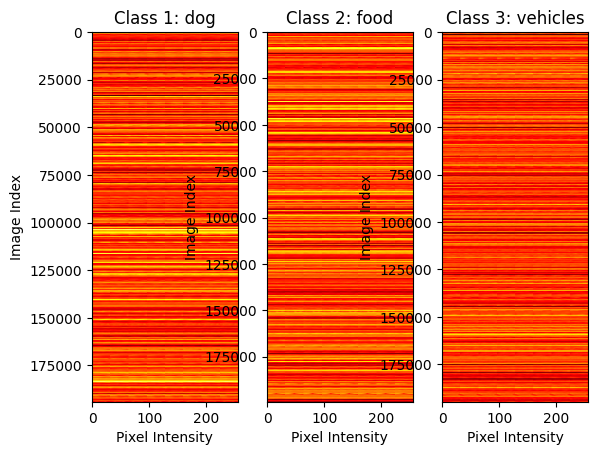

In [6]:
# Creating visualizations to describe the dataset. 

import random

# Define class labels
class_labels = {0: 'dog', 1: 'food', 2: 'vehicles'}

# Create empty arrays to store pixel intensities for each class
class1_pixel_intensities = []
class2_pixel_intensities = []
class3_pixel_intensities = []

# Randomly select 5000 images from the train dataset
random_indices = random.sample(range(len(train_dataset)), 1000)
for idx in random_indices:
    inputs, labels = train_dataset[idx]
    pixel_intensities = np.asarray(inputs.numpy().flatten())
    if labels == 0:  # Class 1
        class1_pixel_intensities.extend(pixel_intensities)
    elif labels == 1:  # Class 2
        class2_pixel_intensities.extend(pixel_intensities)
    elif labels == 2:  # Class 3
        class3_pixel_intensities.extend(pixel_intensities)

# Convert pixel intensities to numpy arrays
class1_pixel_intensities = np.asarray(class1_pixel_intensities)
class2_pixel_intensities = np.asarray(class2_pixel_intensities)
class3_pixel_intensities = np.asarray(class3_pixel_intensities)

# print(class1_pixel_intensities.shape)

# Plot histogram for each class
plt.subplot(131)
plt.hist(class1_pixel_intensities, bins=256, color='blue', alpha=0.5, label=class_labels[0])
plt.legend()
plt.title('Class 1: ' + class_labels[0])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(class2_pixel_intensities, bins=256, color='green', alpha=0.5, label=class_labels[1])
plt.legend()
plt.title('Class 2: ' + class_labels[1])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(class3_pixel_intensities, bins=256, color='red', alpha=0.5, label=class_labels[2])
plt.legend()
plt.title('Class 3: ' + class_labels[2])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for each class
plt.subplot(131)
plt.boxplot(class1_pixel_intensities, notch=True, labels=[class_labels[0]])
plt.title('Class 1: ' + class_labels[0])
plt.ylabel('Pixel Intensity')

plt.subplot(132)
plt.boxplot(class2_pixel_intensities, notch=True, labels=[class_labels[1]])
plt.title('Class 2: ' + class_labels[1])
plt.ylabel('Pixel Intensity')

plt.subplot(133)
plt.boxplot(class3_pixel_intensities, notch=True, labels=[class_labels[2]])
plt.title('Class 3: ' + class_labels[2])
plt.ylabel('Pixel Intensity')

plt.tight_layout()
plt.show()

# Plot heatmap for each class
plt.subplot(131)
plt.imshow(class1_pixel_intensities.reshape(-1, 256), cmap='hot', aspect='auto')
plt.title('Class 1: ' + class_labels[0])
plt.xlabel('Pixel Intensity')
plt.ylabel('Image Index')

plt.subplot(132)
plt.imshow(class2_pixel_intensities.reshape(-1, 256), cmap='hot', aspect='auto')
plt.title('Class 2: ' + class_labels[1])
plt.xlabel('Pixel Intensity')
plt.ylabel('Image Index')

plt.subplot(133)
plt.imshow(class3_pixel_intensities.reshape(-1, 256), cmap='hot', aspect='auto')
plt.title('Class 3: ' + class_labels[2])
plt.xlabel('Pixel Intensity')
plt.ylabel('Image Index')


In [7]:
# Defining the neural network architecture. 

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Create an instance of AlexNet
model = AlexNet(num_classes=3)

# Print the model architecture
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

In [8]:
# Defining a function for training the AlexNet model

def train_alexnet(model, trainloader, valloader, num_epochs=10, learning_rate=0.001):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
   
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        total_train = 0
        correct_train = 0
        
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += targets.size(0)
            correct_train += predicted.eq(targets).sum().item()
        
        # calculating train accuracy
        train_acc = 100. * correct_train / total_train
        train_losses.append(train_loss / len(trainloader))
        train_accs.append(train_acc)
        
        model.eval()
        val_loss = 0.0
        total_val = 0
        correct_val = 0
        
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(valloader):
                inputs, targets = inputs.to(device), targets.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total_val += targets.size(0)
                correct_val += predicted.eq(targets).sum().item()
                
            val_acc = 100. * correct_val / total_val
            val_losses.append(val_loss / len(valloader))
            val_accs.append(val_acc)

        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"Train Loss: {train_losses[-1]:.4f} | val Loss: {val_losses[-1]:.4f}")
        print(f"Train Accuracy: {train_accs[-1]:.2f}% | val Accuracy: {val_accs[-1]:.2f}%\n")

    print(f"Final Accuracy: {val_accs[-1]:.2f}%")

    return train_losses, val_losses, train_accs, val_accs

In [23]:
# saving the weights of the model. This cell was run after training the model. 
torch.save(model.state_dict(),'final_part3.pt')

In [12]:
# Initializing and training the model

model = AlexNet(num_classes=3)
train_losses, val_losses, train_accs, val_accs = train_alexnet(model, train_dataloader, val_dataloader, num_epochs=15, learning_rate=0.001)

Epoch [1/15]
Train Loss: 1.0980 | val Loss: 1.0969
Train Accuracy: 35.05% | val Accuracy: 42.22%

Epoch [2/15]
Train Loss: 1.0929 | val Loss: 1.0742
Train Accuracy: 42.02% | val Accuracy: 48.36%

Epoch [3/15]
Train Loss: 0.8835 | val Loss: 0.7144
Train Accuracy: 57.20% | val Accuracy: 67.22%

Epoch [4/15]
Train Loss: 0.6679 | val Loss: 0.5896
Train Accuracy: 69.91% | val Accuracy: 74.00%

Epoch [5/15]
Train Loss: 0.5800 | val Loss: 0.5462
Train Accuracy: 74.95% | val Accuracy: 76.76%

Epoch [6/15]
Train Loss: 0.4575 | val Loss: 0.3961
Train Accuracy: 81.22% | val Accuracy: 84.47%

Epoch [7/15]
Train Loss: 0.3905 | val Loss: 0.3495
Train Accuracy: 84.79% | val Accuracy: 86.71%

Epoch [8/15]
Train Loss: 0.3523 | val Loss: 0.3093
Train Accuracy: 86.79% | val Accuracy: 88.40%

Epoch [9/15]
Train Loss: 0.3377 | val Loss: 0.3374
Train Accuracy: 87.11% | val Accuracy: 87.67%

Epoch [10/15]
Train Loss: 0.3133 | val Loss: 0.2984
Train Accuracy: 88.49% | val Accuracy: 89.38%

Epoch [11/15]
Train

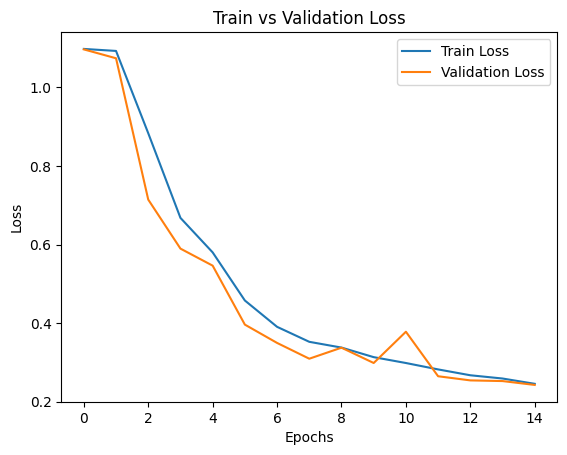

In [13]:
# Plotting trian vs validation loss

plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend(['Train Loss','Validation Loss'])
plt.show()

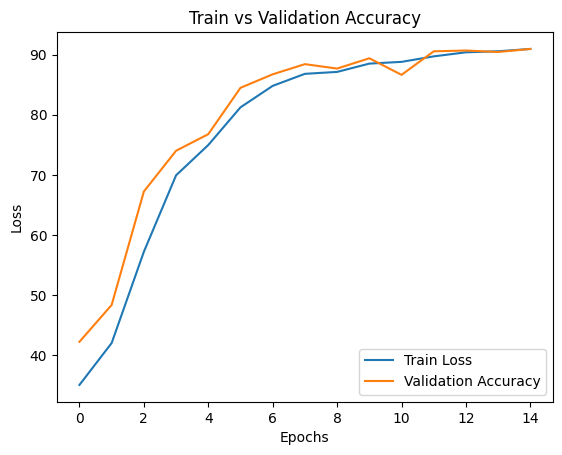

In [14]:
# Plotting train vs validation accuracy
plt.plot(train_accs)
plt.plot(val_accs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Accuracy')
plt.legend(['Train Loss','Validation Accuracy'])
plt.show()

In [25]:
# defining function to run the model on test dataset. 

def test_model(model, testloader):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    t_loss=[]
    t_acc=[]
    test_loss = 0.0
    total_test = 0
    correct_test = 0
    
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total_test += targets.size(0)
            correct_test += predicted.eq(targets).sum().item()

            test_loss /= len(testloader)
            test_acc = 100. * correct_test / total_test
            t_loss.append(test_loss)
            t_acc.append(test_acc)
        print(f"Final Test Loss: {test_loss:.4f} | Final Test Accuracy: {test_acc:.2f}%")
        
        return t_loss, t_acc


In [16]:
test_loss,test_acc=test_model(model,test_dataloader)

Final Test Loss: 0.0013 | Final Test Accuracy: 91.11%


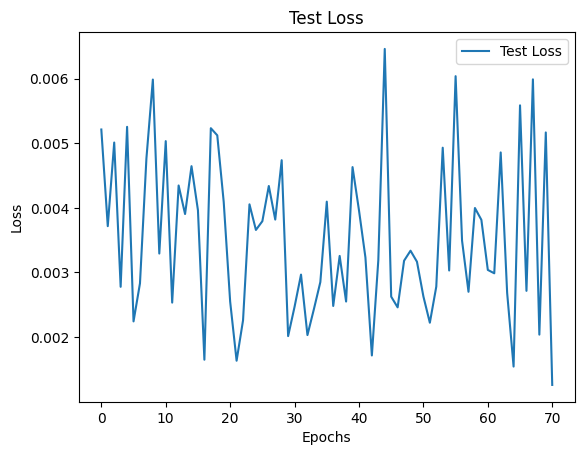

In [17]:
# Plotting test loss

plt.plot(test_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend(['Test Loss'])
plt.show()

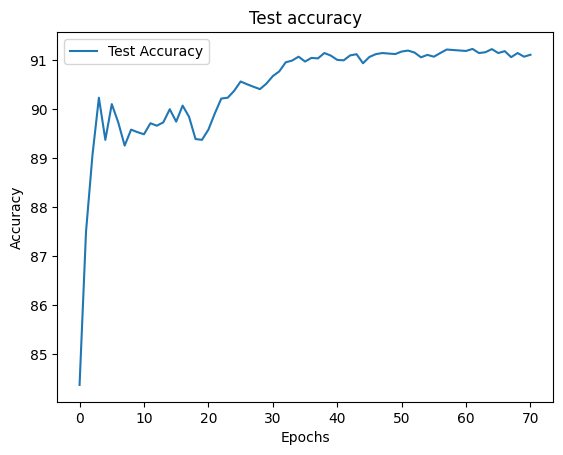

In [18]:
# Plotting test accuracy

plt.plot(test_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test accuracy')
plt.legend(['Test Accuracy'])
plt.show()

## Improved Model

#### Improving the accuracy by reducing the value of droputs

In [18]:
# Defining the improved alexnet architecture by setting a different droupout rate.

class AlexNetImp(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNetImp, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.35),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.35),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Create an instance of AlexNet
model = AlexNet(num_classes=3)

# Print the model architecture
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

In [19]:
# Define a function for training the AlexNet model with early stopping

def train_alexnet2(model, trainloader, valloader, num_epochs=10, learning_rate=0.001, patience=3):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
   
    best_val_loss = float("inf")  # initialize to a very large number
    patience_count = 0  # counter for how many epochs to wait before stopping
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        total_train = 0
        correct_train = 0
        
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += targets.size(0)
            correct_train += predicted.eq(targets).sum().item()

        train_acc = 100. * correct_train / total_train
        train_losses.append(train_loss / len(trainloader))
        train_accs.append(train_acc)
        
        model.eval()
        val_loss = 0.0
        total_val = 0
        correct_val = 0
        
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(valloader):
                inputs, targets = inputs.to(device), targets.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total_val += targets.size(0)
                correct_val += predicted.eq(targets).sum().item()
                
            val_acc = 100. * correct_val / total_val
            val_losses.append(val_loss / len(valloader))
            val_accs.append(val_acc)

        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"Train Loss: {train_losses[-1]:.4f} | val Loss: {val_losses[-1]:.4f}")
        print(f"Train Accuracy: {train_accs[-1]:.2f}% | val Accuracy: {val_accs[-1]:.2f}%\n")
        
        # Check if validation loss has improved
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_count = 0  # reset patience counter
        else:
            patience_count += 1
        
        # Stop training if validation loss has not improved for 'patience' epochs
        if patience_count >= patience:
            print(f"Validation loss has not improved for {patience} epochs. Stopping training.")
            break

    print(f"Final Accuracy: {val_accs[-1]:.2f}%")

    return train_losses, val_losses, train_accs, val_accs


In [21]:
# Training the improved model 
modelimp = AlexNetImp(num_classes=3)
train_losses2, val_losses2, train_accs2, val_accs2 = train_alexnet2(modelimp, train_dataloader, val_dataloader, num_epochs=20, learning_rate=0.001)

Epoch [1/20]
Train Loss: 1.0977 | val Loss: 1.0961
Train Accuracy: 38.60% | val Accuracy: 49.24%

Epoch [2/20]
Train Loss: 1.0773 | val Loss: 0.9813
Train Accuracy: 52.16% | val Accuracy: 51.87%

Epoch [3/20]
Train Loss: 0.7511 | val Loss: 0.6571
Train Accuracy: 66.00% | val Accuracy: 70.13%

Epoch [4/20]
Train Loss: 0.6169 | val Loss: 0.5758
Train Accuracy: 73.44% | val Accuracy: 75.71%

Epoch [5/20]
Train Loss: 0.4894 | val Loss: 0.4716
Train Accuracy: 79.83% | val Accuracy: 80.87%

Epoch [6/20]
Train Loss: 0.3959 | val Loss: 0.3577
Train Accuracy: 84.66% | val Accuracy: 86.00%

Epoch [7/20]
Train Loss: 0.3536 | val Loss: 0.3417
Train Accuracy: 86.62% | val Accuracy: 87.00%

Epoch [8/20]
Train Loss: 0.3368 | val Loss: 0.3252
Train Accuracy: 87.44% | val Accuracy: 87.58%

Epoch [9/20]
Train Loss: 0.3012 | val Loss: 0.2931
Train Accuracy: 88.86% | val Accuracy: 88.91%

Epoch [10/20]
Train Loss: 0.2893 | val Loss: 0.3250
Train Accuracy: 89.10% | val Accuracy: 87.62%

Epoch [11/20]
Train

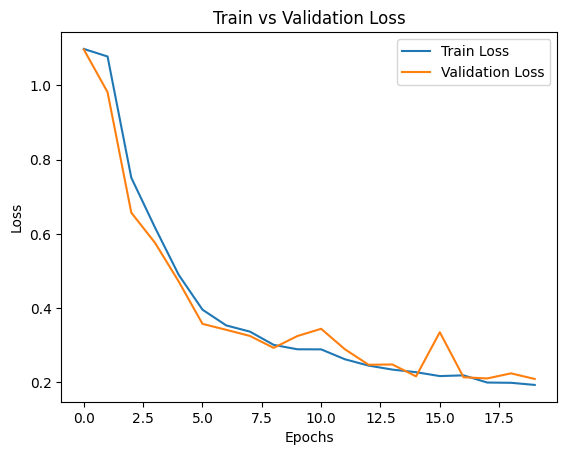

In [22]:
# Plotting train vs validation loss

plt.plot(train_losses2)
plt.plot(val_losses2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend(['Train Loss','Validation Loss'])
plt.show()

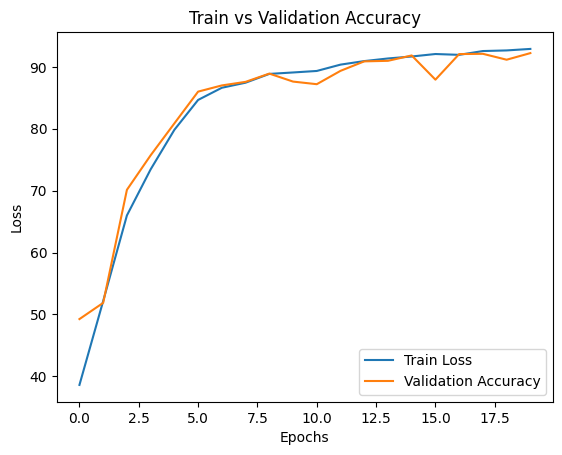

In [23]:
plt.plot(train_accs2)
plt.plot(val_accs2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Accuracy')
plt.legend(['Train Loss','Validation Accuracy'])
plt.show()

In [29]:
# calculating the loss and accuracy on the test dataset

test_loss2,test_acc2=test_model(modelimp,test_dataloader)

Final Test Loss: 0.0016 | Final Test Accuracy: 91.89%


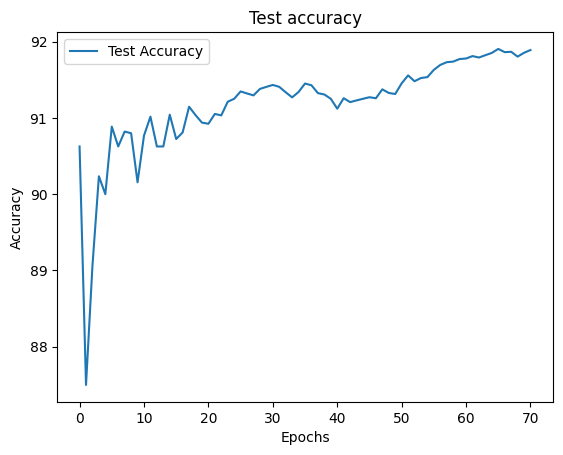

In [30]:
# Plotting test accuracy vs epoch

plt.plot(test_acc2)
#plt.plot(test_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test accuracy')
plt.legend(['Test Accuracy'])
plt.show()

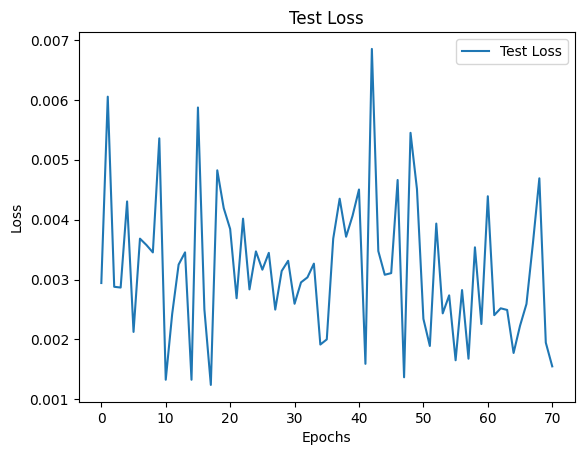

In [28]:
# plotting test loss vs epoch

plt.plot(test_loss2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend(['Test Loss'])
plt.show()

In [31]:
# saving the weights

torch.save(modelimp.state_dict(),'final_part3_improved.pt')

### Google Street View House Numbers (SVHN)

In [15]:

# Define the transforms to be applied on the images
transform1 = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the dataset
data_train = torchvision.datasets.SVHN(root='data/', split='train',transform=transform1)
data_test = torchvision.datasets.SVHN(root='data/',split='test',transform=transform1)
# Split the dataset into train and val datasets
train_size1 = int(0.85 * len(data_train))
val_size1 = int(len(data_train))-train_size1
train_dataset1, val_dataset1 = torch.utils.data.random_split(data_train, [train_size1, val_size1])

# Define the dataloaders for train and val datasets
batch_size = 64
train_dataloader1 = torch.utils.data.DataLoader(train_dataset1, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)
val_dataloader1 = torch.utils.data.DataLoader(val_dataset1, batch_size=batch_size, shuffle=False, num_workers=2,pin_memory=True)
test_dataloader1 = torch.utils.data.DataLoader(data_test, batch_size=batch_size, shuffle=False, num_workers=2)
# Define the class labels based on the subfolder names
# class_labels = dataset.classes

# Print the class labels
# print("Class labels: ", class_labels)
print("Size of train dataset: {}".format(len(train_dataset1)))
print("Size of val dataset: {}".format(len(val_dataset1)))
print("Size of test dataset: {}".format(len(data_test)))

Size of train dataset: 62268
Size of val dataset: 10989
Size of test dataset: 26032


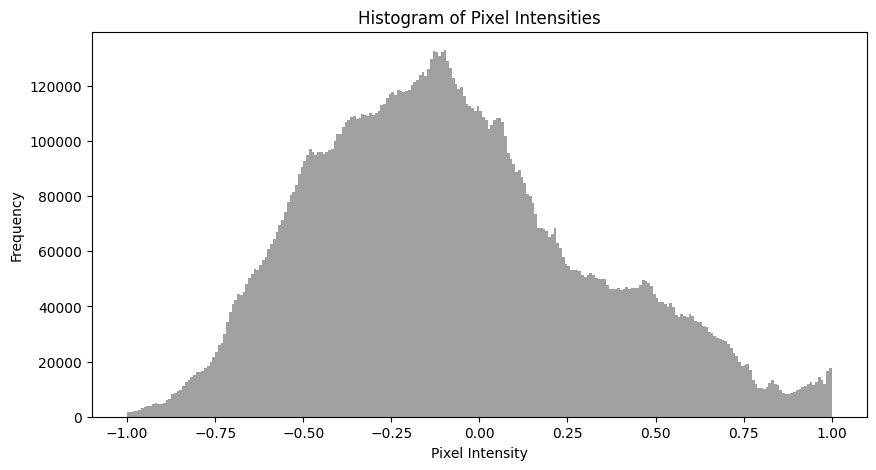

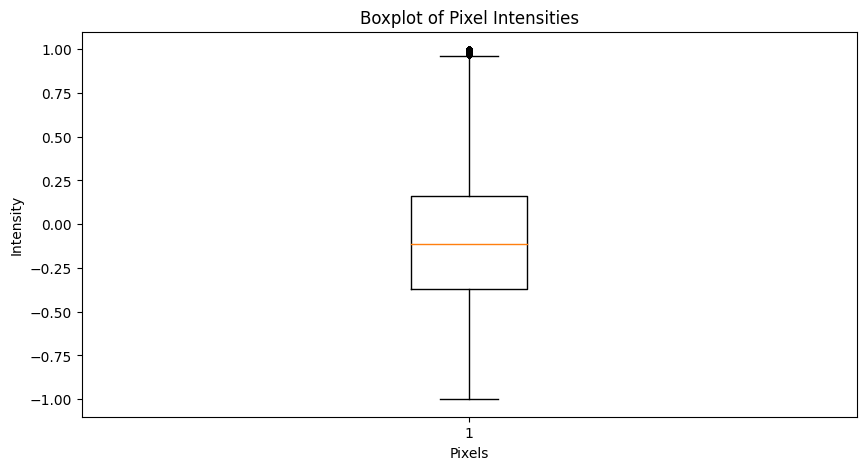

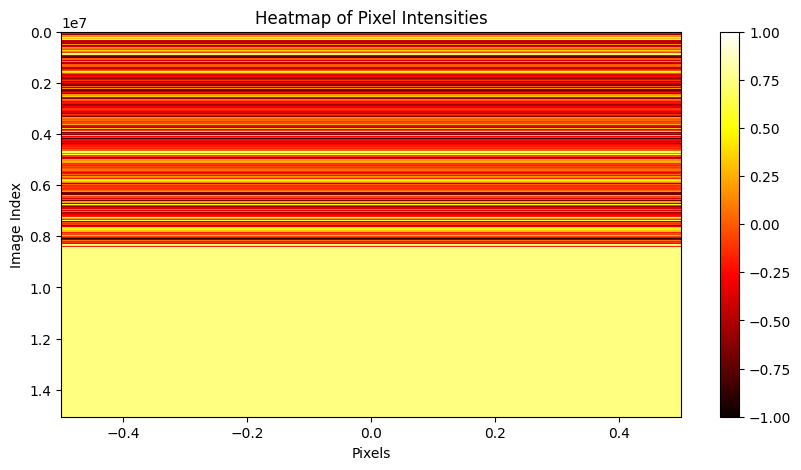

In [6]:
# Plotting visualizations to describe the dataset

# Select 100 random images from the train dataset
num_images = 100
indices = np.random.randint(0, len(data_train), num_images)
images = [data_train[i][0] for i in indices]

# Convert images to numpy arrays
pixel_values = [np.array(image).flatten() for image in images]

pixel_values = np.asarray(pixel_values)

pixel_values = pixel_values.flatten()

# print(pixel_values.shape)


# Plot histogram of pixel intensities
plt.figure(figsize=(10, 5))
plt.hist(pixel_values, bins=256, color='gray', alpha=0.75)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()

# Plot boxplot of pixel intensities
plt.figure(figsize=(10, 5))
plt.boxplot(pixel_values, sym='k.')
plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('Boxplot of Pixel Intensities')
plt.show()

# Plot heatmap
plt.figure(figsize=(10, 5))
plt.imshow(np.vstack(pixel_values), cmap='hot', aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xlabel('Pixels')
plt.ylabel('Image Index')
plt.title('Heatmap of Pixel Intensities')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([64, 3, 224, 224])


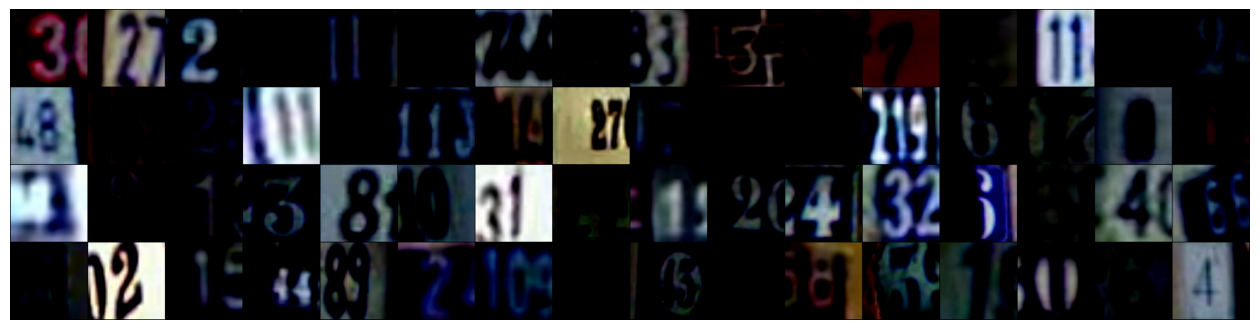

In [7]:
# displaying multiple randomly selected images in a grid

for images, _ in train_dataloader1:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(torchvision.utils.make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [8]:
# Defining the NN architecture for the new dataset with changes described in the report

class AlexNet1(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet1, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(96),

            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x



In [9]:
# training the model 
model1 = AlexNet1(num_classes=10)
train_losses1, val_losses1, train_accs1, val_accs1 = train_alexnet(model1, train_dataloader1, val_dataloader1, num_epochs=10, learning_rate=0.001)

Epoch [1/10]
Train Loss: 2.1630 | val Loss: 2.0519
Train Accuracy: 29.30% | val Accuracy: 40.28%

Epoch [2/10]
Train Loss: 1.9966 | val Loss: 1.9271
Train Accuracy: 47.15% | val Accuracy: 53.67%

Epoch [3/10]
Train Loss: 1.8871 | val Loss: 1.8654
Train Accuracy: 57.95% | val Accuracy: 58.97%

Epoch [4/10]
Train Loss: 1.7844 | val Loss: 1.6764
Train Accuracy: 69.24% | val Accuracy: 80.29%

Epoch [5/10]
Train Loss: 1.6413 | val Loss: 1.5891
Train Accuracy: 83.80% | val Accuracy: 88.24%

Epoch [6/10]
Train Loss: 1.5829 | val Loss: 1.5660
Train Accuracy: 89.00% | val Accuracy: 90.24%

Epoch [7/10]
Train Loss: 1.5645 | val Loss: 1.5518
Train Accuracy: 90.52% | val Accuracy: 91.56%

Epoch [8/10]
Train Loss: 1.5528 | val Loss: 1.5437
Train Accuracy: 91.55% | val Accuracy: 92.28%

Epoch [9/10]
Train Loss: 1.5446 | val Loss: 1.5412
Train Accuracy: 92.19% | val Accuracy: 92.22%

Epoch [10/10]
Train Loss: 1.5381 | val Loss: 1.5388
Train Accuracy: 92.82% | val Accuracy: 92.39%

Final Accuracy: 92.

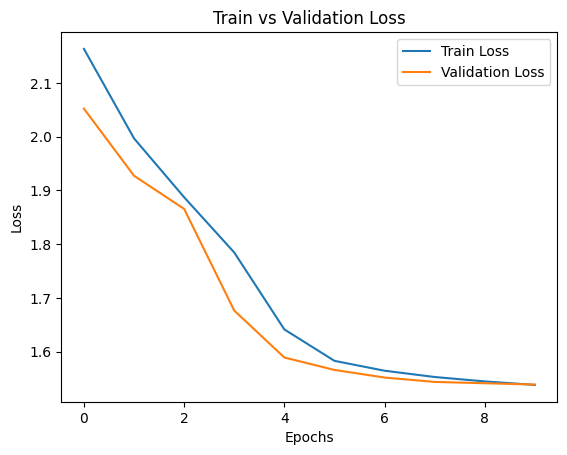

In [10]:
# plotting train vs validation loss
plt.plot(train_losses1)
plt.plot(val_losses1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend(['Train Loss','Validation Loss'])
plt.show()

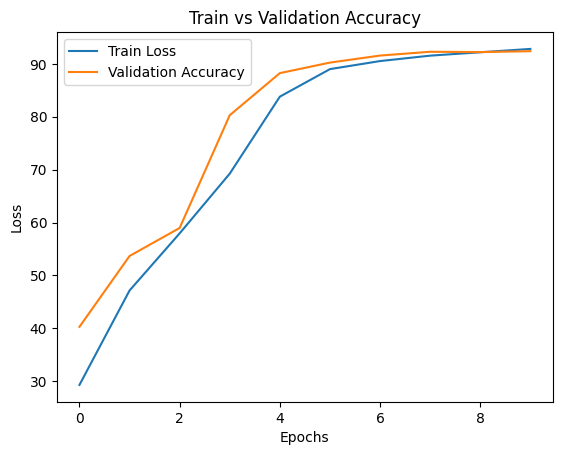

In [11]:
# plotting train vs validation accuracy
plt.plot(train_accs1)
plt.plot(val_accs1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Accuracy')
plt.legend(['Train Loss','Validation Accuracy'])
plt.show()

In [16]:
# displaying loss and accuracy on the test dataset
test_loss1,test_acc1=test_model(model1,test_dataloader1)

Final Test Loss: 0.0037 | Final Test Accuracy: 92.01%


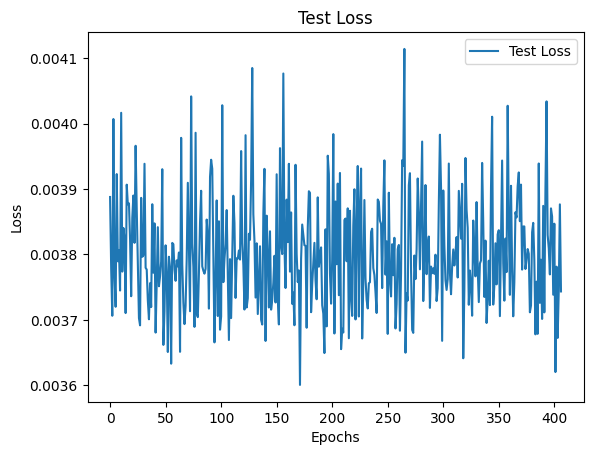

In [17]:
# plotting test loss vs epochs
plt.plot(test_loss1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend(['Test Loss'])
plt.show()

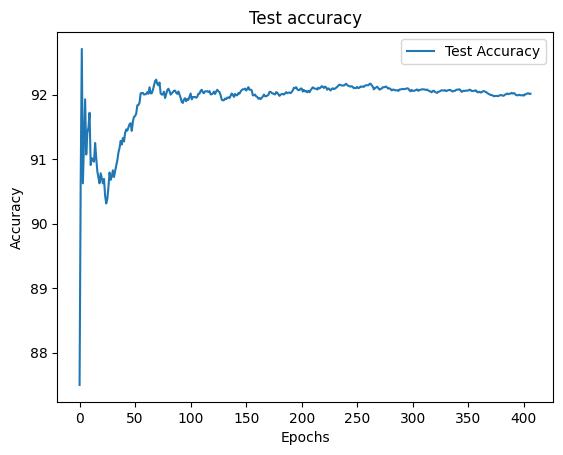

In [18]:
# plotting test accuracy vs epochs
plt.plot(test_acc1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test accuracy')
plt.legend(['Test Accuracy'])
plt.show()

In [24]:
# saving the weights
torch.save(model1.state_dict(),'final_part4.pt')